In [1]:
#This cell block is used to import all the proper libraries and modules needed for the functions in code

import random
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib
import matplotlib.pyplot as plt
import csv
import math
import glob
import errno
import time
import os
import sys
import statistics as stat

import astropy.io.fits as pyfits

#This imports modules to allow easier reading of files using ascii reading functions and tables.
from astropy.io import ascii

26.27862320874889 21.110571570611206


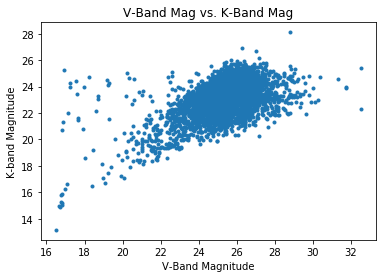

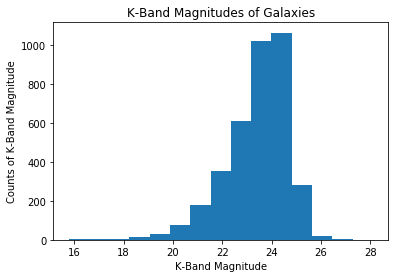

In [2]:
#Declaring arrays and opening catalog with a csv reader along with a 'with' function.
#While these are not used immediately, it is good to declare variables at the start so they stay consistent
#throughout the entire coding
#Here we denote the fluxes in the V and the K band into an array
fluxv = []
fluxk = []
#This makes an array for the values of the fluxes that will fit into the histogram
histflux = []
#This array makes it show we can remember what galaxy number we are looking at for this specific catalog
galnum = []

#Here we denote an array to hold all the values of fluxes that are considered 'good' which we will define later.
goodval = []

#This is one way that you can read in a file, using a with open statement and naming the file as a variable
#in this case: magfile.
#My file path will be different from yours so make sure you write the correct file path to the correct file
#use 'r' to tell the with open function to read the file
with open('/home/jacob/PHOTOMETRY/PHOTOM_CATS/SpARCS-0035_totalall_HAWKIKs.cat', 'r') as magfile:
    #magplots becomes a function to read the magfile in using a comma seperated variable format
    #While this the file is not a csv, we you tweak it so the program reads in it as one.
    magplots = csv.reader(magfile)
    #firstmagline tells python to start reading in the values after the first line and tells python to read 
    #The rest of the document line by line.
    firstmagline = magfile.readline()
    #Reads in each line of code and assigns it a variable name. This is condensed later with the use of
    #ascii.read() but for at the time, csv reading was used.
    #This is not the most efficient way to do it, but it allows you to see what exactly is being read and 
    #where it is being assigned.
    for line in magfile:
        id , ra , dec , x , y , hawkiks_tot , k_flag , k_star , k_fluxrad , totmask , hawkiks , ehawkiks , vimosu , evimosu , vimosb , \
        evimosb , vimosv , evimosv , vimosr , evimosr , vimosi , evimosi , decamz , edecamz , fourstarj1 , efourstarj1 , hawkij , ehawkij , \
        irac1 , eirac1 , irac2, eirac2 , irac3 , eirac3 , irac4 , eirac4 = line.split()
        #Loops through the values of the v and k bands and finds if the flux ratio is less than 0
        #found out later that a negative flux means that the source is so faint compared to the background
        #that when the background is subtracted, the source comes out as 'negative'
        try:
            #these are a test values that are not permanent, they are only used to find out which variables
            #do not fit out criteria of 'good' values. They are looking at the flux ratio values in the v band
            #and the k band.
            testx = float(vimosv)
            testy = float(hawkiks)
        except ValueError:
            print(vimosv, hawkiks)
        if testx < 0.0:
            continue
        if testy < 0.0:
            continue
        #With the proper fluxes found for the bands, this function finds the magnitude of the flux centered
        #centered around 25. The magnitudes are then put into magflux bands for the v and the k band.
        try:
            magfluxv = -2.5 * math.log10(testx) + 25
            magfluxk = -2.5 * math.log10(testy) + 25
        except ValueError:
            print(magfluxv, magfluxk)
        #appends the magnitude of the flux of each band to the before mentioned array
        fluxv.append(magfluxv)
        fluxk.append(magfluxk)
        
        #assigns values of when the 'flag' value within the catalog is 'good'. We are mostly only looking for bad
        #values within the k_flag variable which is a way to denote if a k band magnitude is accurate
        #any k flag value that is not 0, as mentioned in this catalog, has some sort of error attached to it, so
        #we only want the values equal to 0.
        goodflag = float(k_flag)
        goodhawki = float(hawkiks)
        #values of 0 were considered good, so if those flags were good then we could determine if the source
        #was bright enough to do accurate calculations on
        if goodflag != 0.0:
            continue
        try:
            #The if statement above finds a good flag value, then it goes onto the k band flux value and finds if
            #it is bright enough. We do not want to look at any source fainter than 23 magnitude because the values
            #might not be accurate.
            histfluxk = -2.5 * math.log10(goodhawki) + 25
        except ValueError:
            print(histfluxk)
        #appends the id numbers and the k band flux magnitude for that galaxy within the catalog
        histflux.append(histfluxk)
        galnum.append(float(id))
        #with the flags being good, and the k band magnitude being bright enough, we could append the good
        #band values from the catalog for data manipulation
        #With the good k flags and bright enough sources, we can now append the other band values because they are
        #considered good enough.
        goodphoto = float(k_flag)
        goodktot = float(hawkiks_tot)
        goodk = float(hawkiks)
        goodu = float(vimosu)
        goodv = float(vimosv)
        goodb = float(vimosb)
        goodr = float(vimosr)
        goodi = float(vimosi)
        goodj = float(hawkij)
        #lambda values for each band in angstroms
        lamk = 2.2*10**4
        lamu = 3.65*10**3
        lamv = 5.51*10**3
        lamb = 4.45*10**3
        lamr = 6.58*10**3
        lami = 8.06*10**3
        lamj = 1.22*10**4

        #basically the same set up but to build a plot using 'good' values using if statements to cycle through
        #the 'bad' values
        if goodphoto != 0.0:
            continue
        try:
            ranhawk = -2.5*math.log10(goodktot) + 25
        except ValueError:
            print(ranhawk)
            #these if statements cycle through the band values to find if any are below zero. At the time,
            #I did not know that values under 0 are still considered okay, they are just faint compared to the
            #background.
            #If any value is below the if statements restrictions, it is taken out and the cycle begins again.
        if ranhawk > 23.0:
            continue
        if goodk < 0.0:
            continue
        if goodu < 0.0:
            continue
        if goodv < 0.0:
            continue
        if goodb < 0.0:
            continue
        if goodr < 0.0:
            continue
        if goodi < 0.0:
            continue
        if goodj < 0.0:
            continue
        #we fill the arrays with lambda values and the good flux values so we can build plots.
        lamval = [lamu, lamb, lamv, lamr, lami, lamj, lamk]
        goodval = [goodu, goodb, goodv, goodr, goodi, goodj, goodk]
#plots a v band vs k band magnitude graph. Using the appreviation plt calls the matplotlib module functions to
#build plots. The first value is the x axis values while the second value is the y axis values. 
#The final variable in the plt.plot function is how you would like the plot to look. A '.' makes a scattered plot
plt.plot(fluxv, fluxk, '.')
#sets the x axis as V band magnitude
plt.xlabel('V-Band Magnitude')
#sets the y axis as K band magnitude
plt.ylabel('K-band Magnitude')
#makes a title for the graph to tell what is described in the graph.
plt.title('V-Band Mag vs. K-Band Mag')
#to actually show the plot built, you need to use the function plt.show()
plt.show()
#builds a histogram of the number of galaxies that fill each bin. For higher resolution, smaller bin sizes
#can be used. The bins = 15 denotes how many bins should be made, and if the amount of bins is increased, the
#smaller the bins become.
n, bins, patches = plt.hist(histflux, bins = 15)
plt.xlabel('K-Band Magnitude')
plt.ylabel('Counts of K-Band Magnitude')
plt.title('K-Band Magnitudes of Galaxies')
plt.show()

In [3]:
#building arrays for later values, arbitrary x and y values are picked as it is easier to remember for the
#next graph
xval = []
yval = []
#we again declare arrays to hold all the flux values for each band.
fluxu = []
fluxb = []
fluxv = []
fluxr = []
fluxi = []
fluxz = []
fluxy = []
fluxj = []
fluxk = []
fluxi1 = []
fluxi2 = []
#fluxi3 = []
#fluxi4 = []

#error value arrays for later. errors for each band must be held as each flux value has an error attached to it.
erru = []
errb = []
errv = []
errr = []
erri = []
errz = []
erry = []
errj = []
errk = []

#galaxy id "index" array to tell which galaxy we are looking at along with its rest wavelength. This array
#holds the id numbers for the galaxies being manipulated.
galindex = []
#This array holds the red shifted lambda values depending on the galaxies red shift.
xprime = []
#galaxies lambda values for each band
gallamb = []

#opens up a catalog of the transmission curves for all the filters.
#filterfile = ("/Users/grudnick/Work/GOGREEN/Data/Releases/v1.1/PHOTOMETRY/FILTERS/FILTER.RES.GOGREEN")
filterfile = ("/home/jacob/Documents/Research/FILTER.RES.GOGREEN")
f = open(filterfile, 'r')

# make dictionary to hold all filter curves
filtercurves = {}

#opens up catalog along with z_spec catalog
#path = "/Users/grudnick/Work/GOGREEN/Data/Releases/v1.1/PHOTOMETRY"
path = "/home/jacob/PHOTOMETRY"
zfile = path + "/SPECZ_MATCHED/compilation_SpARCS-0035.dat"
#This is a more efficient way to read in files as it automatically assigns variables to each column so they
#can be called later.
zdat = ascii.read(zfile)

photfile = path + "/PHOTOM_CATS/SpARCS-0035_totalall_HAWKIKs.cat"
photdat = ascii.read(photfile)


In [4]:
#strips the lines so that each column has a distinction of variables
for line in f:
    # print(repr(line))
    line = line.strip()
    #This splits the columns so each column is distinctly assigned a variable name.
    cols = line.split()
    # print(cols)

# find number of lines for next filter curve
    nlines = int(cols[0])  # converts string to integer
    filtname = cols[1]  # name of that filter
# initialize array for lambda and transmission
    lam = np.array([])
    trans = np.array([])
    for iline in range(nlines):
    # reads in a single line
        transline = f.readline()
        transline = transline.strip()
        transcols = transline.split()
        #These append values to the above arrays so a peak wavelength can be determined in each band.
        lam = np.append(lam, float(transcols[1]))
        trans = np.append(trans, float(transcols[2]))
    filtercurves[filtname] = {'lam': lam, 'trans': trans}

#print(filtercurves['g'])
#print('wavelength of filter curve = ', filtercurves['g']['lam'])

#finds the wavelength for each filter using a trapz function to find the peak wavelength.
#We utilize the trap z function which is used to integrate over the area of transmission curve using 
#trapezoids.
top = (np.trapz(filtercurves['VIMOSU']['trans'] * filtercurves['VIMOSU']['lam'], x = filtercurves['VIMOSU']['lam']))
bot = (np.trapz(filtercurves['VIMOSU']['trans'], x = filtercurves['VIMOSU']['lam']))
Uwave = top / bot
#print(Uwave, "wavelength of U filter")

top = (np.trapz(filtercurves['VIMOSB']['trans'] * filtercurves['VIMOSB']['lam'], x = filtercurves['VIMOSB']['lam']))
bot = (np.trapz(filtercurves['VIMOSB']['trans'], x = filtercurves['VIMOSB']['lam']))
Bwave = top / bot
#print(Bwave, "wavelength of B filter")

top = (np.trapz(filtercurves['VIMOSV']['trans'] * filtercurves['VIMOSV']['lam'], x = filtercurves['VIMOSV']['lam']))
bot = (np.trapz(filtercurves['VIMOSV']['trans'], x = filtercurves['VIMOSV']['lam']))
Vwave = top / bot
#print(Vwave, "wavelength of V filter")

top = (np.trapz(filtercurves['VIMOSR']['trans'] * filtercurves['VIMOSR']['lam'], x = filtercurves['VIMOSR']['lam']))
bot = (np.trapz(filtercurves['VIMOSR']['trans'], x = filtercurves['VIMOSR']['lam']))
Rwave = top / bot
#print(Rwave, "wavelength of R filter")

top = (np.trapz(filtercurves['VIMOSI']['trans'] * filtercurves['VIMOSI']['lam'], x = filtercurves['VIMOSI']['lam']))
bot = (np.trapz(filtercurves['VIMOSI']['trans'], x = filtercurves['VIMOSI']['lam']))
Iwave = top / bot
#print(Iwave, "Wavelength of I filter")

top = (np.trapz(filtercurves['DECamz']['trans'] * filtercurves['DECamz']['lam'], x = filtercurves['DECamz']['lam']))
bot = (np.trapz(filtercurves['DECamz']['trans'], x = filtercurves['DECamz']['lam']))
Zwave = top / bot
#print(Zwave, "wavelength of Z filter")

top = (np.trapz(filtercurves['FOURSTARJ1']['trans'] * filtercurves['FOURSTARJ1']['lam'], x = filtercurves['FOURSTARJ1']['lam']))
bot = (np.trapz(filtercurves['FOURSTARJ1']['trans'], x = filtercurves['FOURSTARJ1']['lam']))
Ywave = top / bot
#print(Ywave, "wavelength of Y")

top = (np.trapz(filtercurves['HAWKIJ']['trans'] * filtercurves['HAWKIJ']['lam'], x = filtercurves['HAWKIJ']['lam']))
bot = (np.trapz(filtercurves['HAWKIJ']['trans'], x = filtercurves['HAWKIJ']['lam']))
Jwave = top / bot
#print(Jwave, "wavelength of J")

top = (np.trapz(filtercurves['HAWKIKs']['trans'] * filtercurves['HAWKIKs']['lam'], x = filtercurves['HAWKIKs']['lam']))
bot = (np.trapz(filtercurves['HAWKIKs']['trans'], x = filtercurves['HAWKIKs']['lam']))
Kwave = top / bot
#print(Kwave, "wavelength of K")

top = (np.trapz(filtercurves['IRAC1']['trans'] * filtercurves['IRAC1']['lam'], x = filtercurves['IRAC1']['lam']))
bot = (np.trapz(filtercurves['IRAC1']['trans'], x = filtercurves['IRAC1']['lam']))
I1wave = top / bot
print(I1wave, "wavelength of IRAC1")

top = (np.trapz(filtercurves['IRAC2']['trans'] * filtercurves['IRAC2']['lam'], x = filtercurves['IRAC2']['lam']))
bot = (np.trapz(filtercurves['IRAC2']['trans'], x = filtercurves['IRAC2']['lam']))
I2wave = top / bot
print(I2wave, "wavelength of IRAC2")

#not needed, but does the same thing for the IRAC3/4 bands
#top = (np.trapz(filtercurves['IRAC3']['trans'] * filtercurves['IRAC3']['lam'], x = filtercurves['IRAC3']['lam']))
#bot = (np.trapz(filtercurves['IRAC3']['trans'], x = filtercurves['IRAC3']['lam']))
#I3wave = top / bot
#print(I3wave, "wavelength of IRAC3")

#top = (np.trapz(filtercurves['IRAC4']['trans'] * filtercurves['IRAC4']['lam'], x = filtercurves['IRAC4']['lam']))
#bot = (np.trapz(filtercurves['IRAC4']['trans'], x = filtercurves['IRAC4']['lam']))
#I4wave = top / bot
#print(I4wave, "wavelength of IRAC4")

#appends the wavelength values from the trapz functions to the 'x' coordinate array
xval.append(Uwave)
xval.append(Bwave)
xval.append(Vwave)
xval.append(Rwave)
xval.append(Iwave)
xval.append(Zwave)
xval.append(Ywave)
xval.append(Jwave)
xval.append(Kwave)
#xval.append(I1wave)
#xval.append(I2wave)
#xval.append(I3wave)
#xval.append(I4wave)
print(xval)

35634.260329464596 wavelength of IRAC1
45110.187071778135 wavelength of IRAC2
[3749.196280143219, 4326.662575425886, 5478.756947115411, 6485.848858220533, 8215.965645253278, 9179.498493719297, 10551.440926936704, 12583.924128678638, 21485.081904803104]


In [5]:
#This cell determines the frequencies of each wavelength to change the flux ratio to a wavelength value
freq = []
#freq = [(3 * 10**18) / xval]
#for lam in range(11):
    #freq.append((3 * 10**18) / xval[lam])
#print(freq)
for lam in range(9):
    freq.append((3 * 10**18) / xval[lam])

In [6]:
#this turns the array of of the total magnitude of K band so vector math can be used on it.
totmag = np.vectorize(photdat['HAWKIKs_tot'])
#This function finds out the magnitude for each K band flux so that we can find out if it is bright enough
goodmag = -2.5 * np.log10(photdat['HAWKIKs_tot']) + 25

# a better way is to use the numpy.where() command
# this is an array of all indices which satisfy the condition in the ()
izspec = np.where((zdat['quality'] > 0) & (photdat['totmask'] == 0) & (photdat['K_flag'] == 0) & (goodmag < 23))
#izspec = np.where(np.any(zdat['quality'] == 3 or zdat['quality'] == 4) & (photdat['totmask'] == 0) & (photdat['K_flag'] == 0) & (goodmag < 23))
#print(izspec)

# this prints the rows of the two tables that correspond to these indices
#print(photdat['id'][izspec], zdat['PHOTCATID'][izspec], zdat['spec_z'][izspec])

# an equally good way is to make an array of booleans
# this makes an array of the same size as your table, but with a list of "True" and "False" depending on whether or not you satisfy the condition
#goodvals = ((zdat['spec_z'] > 0) & (photdat['totmask'] == 0))
#print(goodvals)

# this prints the rows of the two tables that have the Boolean value==True
#print(photdat['id'][goodvals], zdat['PHOTCATID'][goodvals], zdat['spec_z'][goodvals])

#assigns a 'seed' for the random galaxies so that the galaxies selected ARE random, but when running functions
#and plots, the galaxies selected stay the same
random.seed(24)
#This builds a list of all the random galaxies listed from the seed. The k=5 says that we only want 5 galaxies
#to be a part of this list. Each one of these galaxies have good values for their zspec and their fluxes. 
#the print statement returns the Id number attached to these five galaxies.
sample_list = random.sample(list(photdat['id'][izspec]), k=5)
print(sample_list)

[4531, 2592, 3594, 1943, 2036]


In [7]:
#for loop to append the proper values for each galaxy as listed from the random galaxies
for rangal in sample_list:
    #it was discovered that the IDs listed above are not actually the IDs of the galaxy but the index number 
    #for those galaxies. This function calls the id number attached to that galaxy from the index number.
    #this is very dangerous to do, so make sure you check your values periodically.
    print('rangal: ', rangal)
    print('id: ', list(photdat['id']).index(rangal))
    index = list(photdat['id']).index(rangal)
    galindex.append(photdat['id'][index])
    #appends the flux values for each band using the index number of the good galaxies.
    fluxu.append(photdat['VIMOSU'][index])
    fluxb.append(photdat['VIMOSB'][index])
    fluxv.append(photdat['VIMOSV'][index])
    fluxr.append(photdat['VIMOSR'][index])
    fluxi.append(photdat['VIMOSI'][index])
    fluxz.append(photdat['DECamz'][index])
    fluxy.append(photdat['FOURSTARJ1'][index])
    fluxj.append(photdat['HAWKIJ'][index])
    fluxk.append(photdat['HAWKIKs'][index])
    #appends the errors attached to each band using the index number of the good galaxies.
    erru.append(photdat['eVIMOSU'][index])
    errb.append(photdat['eVIMOSB'][index])
    errv.append(photdat['eVIMOSV'][index])
    errr.append(photdat['eVIMOSR'][index])
    erri.append(photdat['eVIMOSI'][index])
    errz.append(photdat['eDECamz'][index])
    erry.append(photdat['eFOURSTARJ1'][index])
    errj.append(photdat['eHAWKIJ'][index])
    errk.append(photdat['eHAWKIKs'][index])
    #fluxi1.append(photdat['IRAC1'][index])
    #fluxi2.append(photdat['IRAC2'][index])
    #fluxi3.append(photdat['IRAC3'][index])
    #fluxi4.append(photdat['IRAC4'][index])

rangal:  4531
id:  4530
rangal:  2592
id:  2591
rangal:  3594
id:  3593
rangal:  1943
id:  1942
rangal:  2036
id:  2035


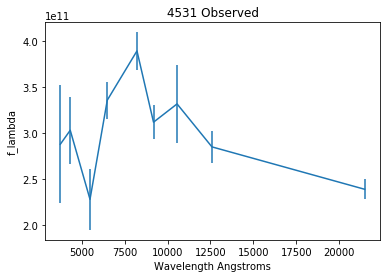

21.593652450423505


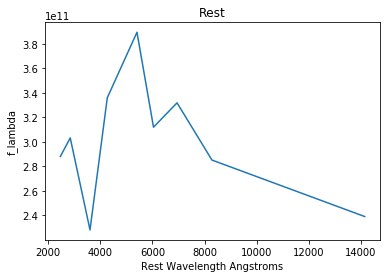

0.519


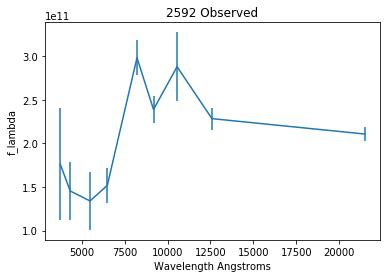

21.837660445543285


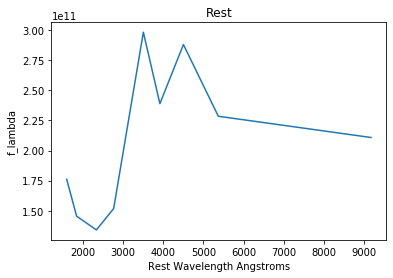

1.342


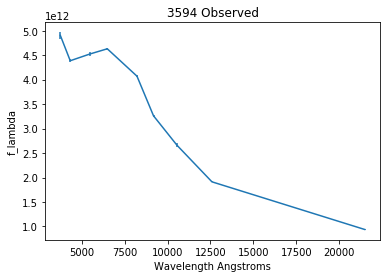

19.760847688236467


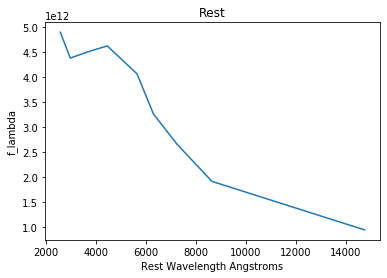

0.455


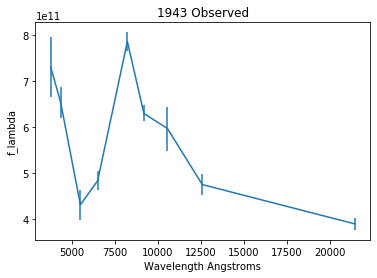

21.091119311559922


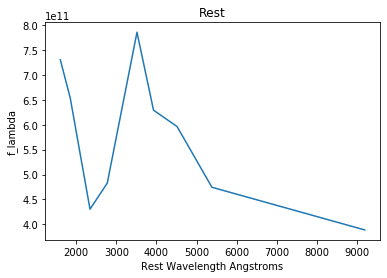

1.337


/home/jacob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


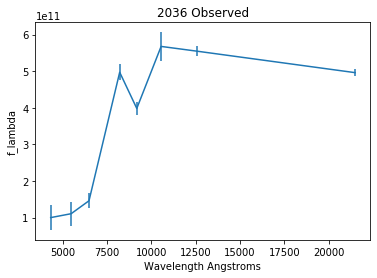

20.843506745294963


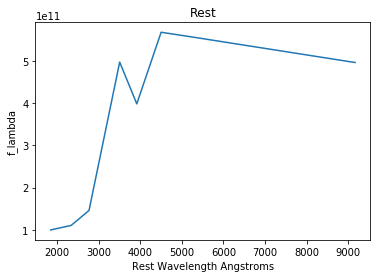

1.344


In [8]:
#for loop to find magnitude of each flux value for the galaxies along with their error
for galaxy in range(5): #This for loop goes through all the galaxies in range of 5 since we listed 5 galaxies
    galy = [fluxu[galaxy],fluxb[galaxy], fluxv[galaxy], fluxr[galaxy], fluxi[galaxy], fluxz[galaxy], fluxy[galaxy], fluxj[galaxy], fluxk[galaxy]]
    #this builds an array filling it with the flux values in each band for each of the random galaxies
    #galy = [fluxu[galaxy],fluxb[galaxy], fluxv[galaxy], fluxr[galaxy], fluxi[galaxy], fluxz[galaxy], fluxy[galaxy], fluxj[galaxy], fluxk[galaxy], fluxi1[galaxy],fluxi2[galaxy]]
    magu = -2.5 * np.log10(fluxu[galaxy]) + 25
    magv = -2.5 * np.log10(fluxv[galaxy]) + 25
    magb = -2.5 * np.log10(fluxb[galaxy]) + 25 #These finds the magnitude of each band for the galaxies
    magr = -2.5 * np.log10(fluxr[galaxy]) + 25
    magi = -2.5 * np.log10(fluxz[galaxy]) + 25
    magz = -2.5 * np.log10(fluxz[galaxy]) + 25
    magy = -2.5 * np.log10(fluxy[galaxy]) + 25
    magj = -2.5 * np.log10(fluxj[galaxy]) + 25
    magk = -2.5 * np.log10(fluxk[galaxy]) + 25
    #magi1 = -2.5 * np.log10(fluxi1[galaxy]) + 25
    #magi2 = -2.5 * np.log10(fluxi2[galaxy]) + 25
   
    mageu = -2.5 * np.log10(erru[galaxy]) + 25
    magev = -2.5 * np.log10(errv[galaxy]) + 25
    mageb = -2.5 * np.log10(errb[galaxy]) + 25
    mager = -2.5 * np.log10(errr[galaxy]) + 25
    magei = -2.5 * np.log10(erri[galaxy]) + 25 #error in each flux band.
    magez = -2.5 * np.log10(errz[galaxy]) + 25
    magey = -2.5 * np.log10(erry[galaxy]) + 25
    magej = -2.5 * np.log10(errj[galaxy]) + 25
    magek = -2.5 * np.log10(errk[galaxy]) + 25
    #converting the magnitude to f_nu along with error
    fnuu = (10 ** ((magu + 48.6) / -2.5)) * magu
    fnub = (10 ** ((magb + 48.6) / -2.5)) * magv
    fnuv = (10 ** ((magv + 48.6) / -2.5)) * magb
    fnur = (10 ** ((magr + 48.6) / -2.5)) * magr
    fnui = (10 ** ((magi + 48.6) / -2.5)) * magi
    fnuz = (10 ** ((magz + 48.6) / -2.5)) * magz
    fnuk = (10 ** ((magk + 48.6) / -2.5)) * magy
    fnuy = (10 ** ((magy + 48.6) / -2.5)) * magj
    fnuj = (10 ** ((magj + 48.6) / -2.5)) * magk
    #fnui1 = (10 ** ((magi1 + 48.6) / -2.5)) * mag25
    #fnui2 = (10 ** ((magi2 + 48.6) / -2.5)) * mag25
    
    fnueu = (10 ** ((mageu + 48.6) / -2.5)) * mageu
    fnueb = (10 ** ((mageb + 48.6) / -2.5)) * mageb
    fnuev = (10 ** ((magev + 48.6) / -2.5)) * magev
    fnuer = (10 ** ((mager + 48.6) / -2.5)) * mager
    fnuei = (10 ** ((magei + 48.6) / -2.5)) * magei
    fnuez = (10 ** ((magez + 48.6) / -2.5)) * magez
    fnuek = (10 ** ((magek + 48.6) / -2.5)) * magek
    fnuey = (10 ** ((magey + 48.6) / -2.5)) * magey
    fnuej = (10 ** ((magej + 48.6) / -2.5)) * magej
    #changing f_nu values to f_lambda values for each galaxy and band along with error 
    flamu = (((3 * 10 ** 18) / ((xval[0]) ** 2)) * fnuu) * ((0.361 * 10**6) / (10**-23))
    flamb = (((3 * 10 ** 18) / ((xval[1]) ** 2)) * fnub) * ((0.361 * 10**6) / (10**-23))
    flamv = (((3 * 10 ** 18) / ((xval[2]) ** 2)) * fnuv) * ((0.361 * 10**6) / (10**-23))
    flamr = (((3 * 10 ** 18) / ((xval[3]) ** 2)) * fnur) * ((0.361 * 10**6) / (10**-23))
    flami = (((3 * 10 ** 18) / ((xval[4]) ** 2)) * fnui) * ((0.361 * 10**6) / (10**-23))
    flamz = (((3 * 10 ** 18) / ((xval[5]) ** 2)) * fnuz) * ((0.361 * 10**6) / (10**-23))
    flamj = (((3 * 10 ** 18) / ((xval[7]) ** 2)) * fnuj) * ((0.361 * 10**6) / (10**-23))
    flamk = (((3 * 10 ** 18) / ((xval[8]) ** 2)) * fnuk) * ((0.361 * 10**6) / (10**-23))
    flamy = (((3 * 10 ** 18) / ((xval[6]) ** 2)) * fnuy) * ((0.361 * 10**6) / (10**-23))
    #flami1 = (((3 * 10 ** 18) / ((xval[9]) ** 2)) * fnui1) * ((0.361 * 10**6) / (10**-23))
    #flami2 = (((3 * 10 ** 18) / ((xval[10]) ** 2)) * fnui2) * ((0.361 * 10**6) / (10**-23))
    #this converts the errors of each band from f_nu to f_lambda
    flameu = (((3 * 10 ** 18) / ((xval[0]) ** 2)) * fnueu) * ((0.361 * 10**6) / (10**-23))
    flameb = (((3 * 10 ** 18) / ((xval[1]) ** 2)) * fnueb) * ((0.361 * 10**6) / (10**-23))
    flamev = (((3 * 10 ** 18) / ((xval[2]) ** 2)) * fnuev) * ((0.361 * 10**6) / (10**-23))
    flamer = (((3 * 10 ** 18) / ((xval[3]) ** 2)) * fnuer) * ((0.361 * 10**6) / (10**-23))
    flamei = (((3 * 10 ** 18) / ((xval[4]) ** 2)) * fnuei) * ((0.361 * 10**6) / (10**-23))
    flamez = (((3 * 10 ** 18) / ((xval[5]) ** 2)) * fnuez) * ((0.361 * 10**6) / (10**-23))
    flamej = (((3 * 10 ** 18) / ((xval[7]) ** 2)) * fnuej) * ((0.361 * 10**6) / (10**-23))
    flamek = (((3 * 10 ** 18) / ((xval[8]) ** 2)) * fnuek) * ((0.361 * 10**6) / (10**-23))
    flamey = (((3 * 10 ** 18) / ((xval[6]) ** 2)) * fnuey) * ((0.361 * 10**6) / (10**-23))
    
    #setting the y axis for the plot and adding the error array so that error can be added to the plot
    gallamy = [flamu, flamb, flamv, flamr, flami, flamz, flamy, flamj, flamk]
    error = [flameu, flameb, flamev, flamer, flamei, flamez, flamey, flamej, flamek]
    #builds a plot for the observed flux in terms of lambda and the wavelength of each band
    plt.errorbar(xval, gallamy, yerr = error) #This function plots a graph with errorbars. The x axis does
    #not have error bars so we only have to declare the error values for the y values.
    plt.xlabel('Wavelength Angstroms')
    plt.ylabel('f_lambda')
    titlestr = str(galindex[galaxy]) + ' Observed'
    #plt.title('Galaxy One: ', galindex[galaxy])
    #plt.title('Observed')
    plt.title(titlestr)
    #You are using galindex as an index, when it is really an ID.  In the specific case of *this* catalog
    #this kind of works (if you subtract -1) because the IDs are sequential starting at 1.  But for a 
    #generic catalog this won't work.
    #for the love of god, don't ever call non-index variables "index":-)
    magstr = 'Kmag = ' + "{:0.2f}".format(goodmag[galindex[galaxy] - 1])
    #plt.text(10000, 8, goodmag[galindex[galaxy]])
    #plt.text(15000, 1.1e-19, magstr)
    plt.show()
    print(goodmag[galindex[galaxy]-1])
    #determines the redshift for each galaxy as taken from the z-spec catalog and assigns the galaxy ID with
    #the proper redshift value
    z = zdat['spec_z'][galindex[galaxy]-1]
    #changes the observed wavelength the flux was taken at and converts it to the rest wavelength based on
    #the redshift of the galaxy
    rest = xval / (1+z)
    #print("z is equal to: ", z,"rest: ", rest)
    xprime.append(rest) #lambda_rest = lambda_obs / (1+z)
    #print(xprime)
    #plots the flux in terms of lambda at the rest wavelength for each band for each galaxy we also return
    #the redshift of each galaxy to see how the redshift affects the peak fluxes of the graphs.
    plt.plot(xprime[galaxy], gallamy, '-')
    #fig = plt.plot(plt.plot(xprime[galaxy], gallamy, '-'))
    #ax = fig.add_axes([0,0,1,1])
    plt.xlabel('Rest Wavelength Angstroms')
    plt.ylabel('f_lambda')
    plt.title('Rest')
    plt.show()
    print(z)

In [38]:
#assigns a cluster name array along with the K band filter name that was used for each catalog
clustname = ["SpARCS-0035", "SpARCS-0219", "SpARCS-0335", "SpARCS-1034", "SpARCS-1051", "SpARCS-1616",\
             "SpARCS-1634", "SpARCS-1638", "SPTCL-0205", "SPTCL-0546", "SPTCL-2106"]
#names: 0035, 0219, 0335, 1034, 1051,1616, 1634, 1638, 0205, 0546, 2106
extname = ["HAWKIKs","FOURSTARKs","HAWKIKs", "WIRCamK", "WIRCamK", "WIRCamK", "WIRCamK",\
           "WIRCamK", "FOURSTARKs", "FOURSTARKs", "HAWKIKs"]

#initialize dictionary
photdat = {}
zdat = {}
goodindx = {}
goodgal = {}

#path of the files to the redshift values and the flux values in their respected catalogs.
catpath = "/home/jacob/PHOTOMETRY/PHOTOM_CATS/"
#catpath = "/Users/grudnick/Work/GOGREEN/Data/Releases/v1.1/PHOTOMETRY/PHOTOM_CATS/"
zpath = "/home/jacob/PHOTOMETRY/SPECZ_MATCHED/"
#zpath = "/Users/grudnick/Work/GOGREEN/Data/Releases/v1.1/PHOTOMETRY/SPECZ_MATCHED/"
#path to the residuals
respath = "/home/jacob/PHOTOMETRY/BESTFIT_SEDs+EAZY/for_greg/"

filtlam = {'VIMOSU' : 3749., 'MegaCamu' : 3832. , 'VIMOSB' : 4326. , 'Suprimeg' : 4777. , 'VIMOSV' : 5478. , 
          'Suprimer' : 6288. , 'VIMOSR' : 6485. , 'Suprimei' : 7683. , 'VIMOSI' : 8215. , 'HSCz' : 8904. , 
          'VIMOSz' : 9028. , 'DECamz' : 9179. , 'GMOSz' : 9111. , 'HSCy' : 9767. , 'Suprimey' : 9966. , 
          'HAWKIY' : 10238. , 'FOURSTARJ1' : 10551. , 'HAWKIJ' : 12583. , 'FOURSTARJ' : 12415. , 'WIRCamJ' : 12538.
           , 'FOURSTARKs' : 21480. , 'HAWKIKs' : 21485. , 'WIRCamK' : 21592. , 'IRAC1' : 35634. , 'IRAC2' : 45110.}

clustz = {'SPTCL-0205' : 1.320 , 'SPTCL-0546' : 1.067 , 'SPTCL-2106' : 1.132 , 'SpARCS-0035' : 1.335 , 
         'SpARCS-0219' : 1.325 , 'SpARCS-0335' : 1.368 , 'SpARCS-1034' : 1.386 , 'SpARCS-1051' : 1.035 , 'SpARCS-1616' : 1.156
         , 'SpARCS-1634' : 1.177 , 'SpARCS-1638' : 1.196}

In [39]:
#loop through all the cluster names, using an index so that you can also access
#the appropriate element of extname

#make a dictionary for each band 
resid = {}

for iclust in range(len(clustname)): #this starts a for loop with the variable of iclust to denote the cluster

    
    
    #catalog. sets the range as the number of catalogs already determined.
    filepath = catpath + clustname[iclust] + "_totalall_" + extname[iclust] + ".cat"
    photdat[clustname[iclust]] = ascii.read(filepath) #reads in the files using ascii tables for easier
    #data manipulation.
    
    filepath = zpath + "compilation_" + clustname[iclust] + ".dat"
    zdat[clustname[iclust]] = ascii.read(filepath)
    
    goodindx[clustname[iclust]] = np.where((photdat[clustname[iclust]]['totmask'] == 0) & \
                                           (photdat[clustname[iclust]]['K_flag'] == 0) &\
                    ((zdat[clustname[iclust]]['quality'] == 3) | (zdat[clustname[iclust]]['quality'] == 4)))
    goodindx[clustname[iclust]] = goodindx[clustname[iclust]][0] #this function determines the good galaxies
    #to consider looking at when totmask and k flag are equal to 0. We use the numpy.where() function to basically
    #set up a bunch of if statements to cycle through all the values and find 'where' the conditions are met
    #and saves them into an array.
    
    for igood in range(len(goodindx[clustname[iclust]])):
        #makes a string which contains the ID # of every galaxy that passed the above where command
        idstring = str(photdat[clustname[iclust]]['id'][goodindx[clustname[iclust]][igood]])
        #print(idstring)
        #read in the residual file for that galaxy
        resfilepath = respath + clustname[iclust] + "_totalall_Ks_" + idstring + ".obs_sed"
        residfiledat = ascii.read(resfilepath)
        #put a loop here that goes line by line through residfiledat, finds which filter
        #each line corresponds to (which you call filt), and assigns the appropriate columns
        #to an additional set of keys
        for iline in range(len(residfiledat)):
            #parse those lines using the split() command
            #cols = lines.split()
            #print('line: ', iline)
            #print(residfiledat['lambda'][1])
            #determine which filter each line is and call that filt
            #for sparcs 0035 the filter list goes as thus: hawkiks, Vimosu,b,v,r,i,decamz, Fourstarj1, HawkiJ
            #IRAC1, IRAC2. This is 11 filters/rows to worry about. But the row # for each of these filters
            #changes depending on the catalog. I feel like I need to do a nested for loop to loop through all
            #the catalogs to assign filters to each catalog for the dictionary so when I run through this loop
            #I can just say [filt][vimosu] for instance into the goodgal dictionary and that will take me to 
            #the right row.
            #this is a dictionary whose first key is the name of the cluster
            #second key is a string containing the id
            #third key is the band
            #4th-?? keys are the fdat, fmod, etc.
            #goodgal[clustname[iclust]][idstring][filt]['fmod'] = cols[2]
            #goodgal[clustname[iclust]][idstring][filt]['fdat'] = cols[6]
            #goodgal[clustname[iclust]][goodindx[clustname[iclust]]][zdat['z_spec']]

            #this is the tolerance with which I will test whether the wavelength is similar to that 
            #in my wavelength dictionary
            lammatch_tol = 10.0   
            for key in filtlam:
                lamdiff = abs(float(residfiledat[iline]['lambda']) - filtlam[key])
                #print(key, filtlam[key],residfiledat[iline]['lambda'], lamdiff)
                #if key == 'HAWKIKs':
                    #print(key, filtlam[key],residfiledat[iline]['lambda'], lamdiff)
                if lamdiff < lammatch_tol: 
                    #test if this filter has already been used in the dictionary.  if it has not been created
                    #then create it, make an empty array for the residuals, and an empty array for the redshift, 
                    #and then fill the first values of those arrays.
                    #if it has been made, then append the values to those arrays
                    residval = ((residfiledat[iline]['tempa_zprior'] - residfiledat[iline]['flux_cat']) 
                    / residfiledat[iline]['flux_cat'])
                    
                    #print('match:' , 'galaxy id = ', 
                          #photdat[clustname[iclust]]['id'][goodindx[clustname[iclust]][igood]]
                          #,'redshift = ', 
                          #zdat[clustname[iclust]]['spec_z'][goodindx[clustname[iclust]][igood]], 
                          #key, filtlam[key], residfiledat[iline]['lambda'], lamdiff, residval)
                    
                    if key in resid:
                        resid[key]['clustname'] = np.append(resid[key]['clustname'], clustname[iclust])
                        resid[key]['resid'] = np.append(resid[key]['resid'], residval)
                        resid[key]['z'] = np.append(resid[key]['z'], 
                                                    zdat[clustname[iclust]]['spec_z'][goodindx[clustname[iclust]][igood]])
                        resid[key]['error'] = np.append(resid[key]['error'], residfiledat[iline]['err_cat'])
                        #print('key:' , key , 'exists', resid[key])
                        

                    else: 
                        #now make the dictionary entry because it doesn't exist
                        resid[key] = {}
                        resid[key]['clustname'] = np.array([])
                        resid[key]['resid'] = np.array([]) 
                        resid[key]['error'] = np.array([])
                        resid[key]['z'] = np.array([])  
                        resid[key]['clustname'] = np.append(resid[key]['clustname'], clustname[iclust])
                        resid[key]['resid'] = np.append(resid[key]['resid'], residval)
                        resid[key]['error'] = np.append(resid[key]['error'], residfiledat[iline]['err_cat'])
                        resid[key]['z'] = np.append(resid[key]['z'], 
                                                    zdat[clustname[iclust]]['spec_z'][goodindx[clustname[iclust]][igood]])
                        #print('key created', key, resid[key])
 
            
            #don't forget to include the redshift in this dictionary

/home/jacob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in double_scalars


In [36]:
#print(resid)

Next steps: 
*assign each band a wavelength that goes out to the single digits place for easier computation.
*With each bands wavelength specified, I can start building dictionaries for each band to build a plot
*Build plots for each band 

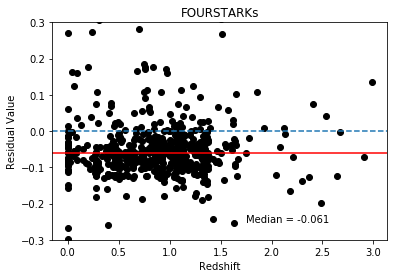

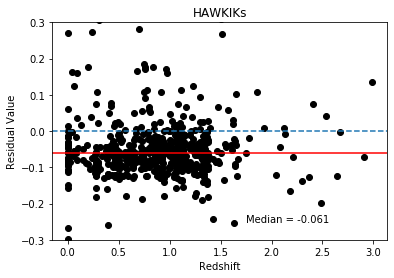

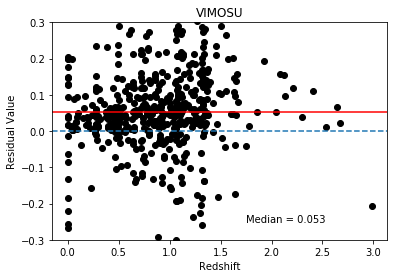

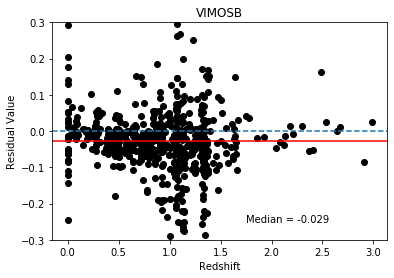

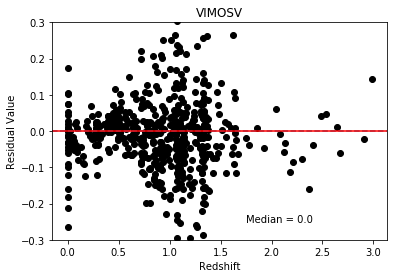

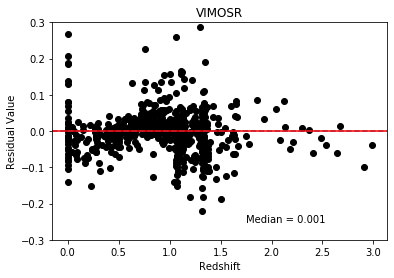

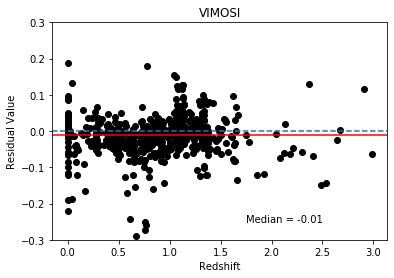

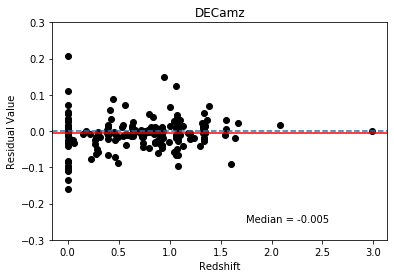

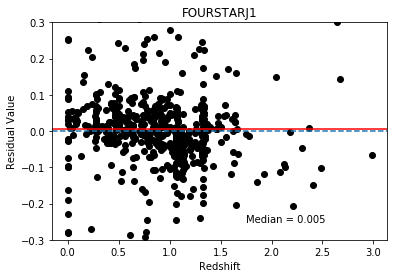

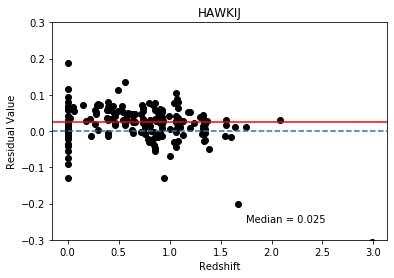

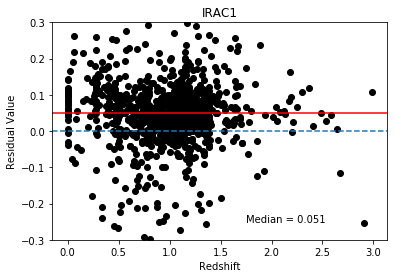

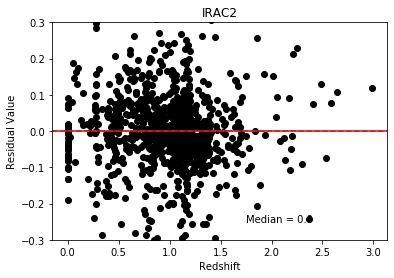

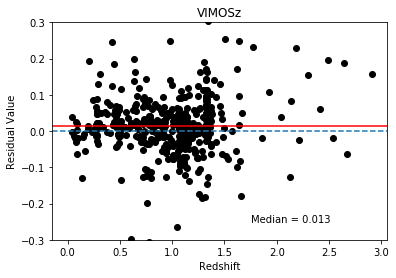

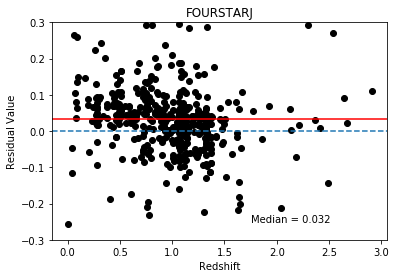

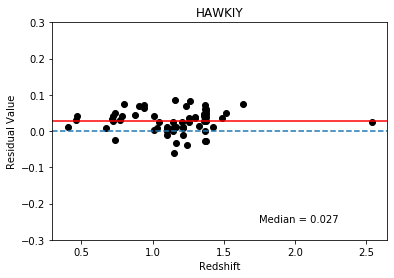

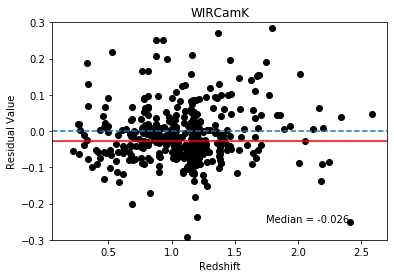

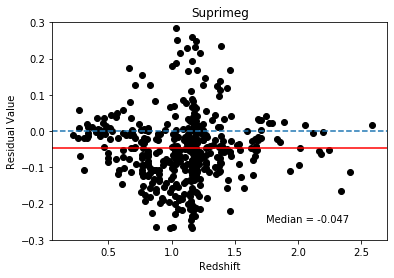

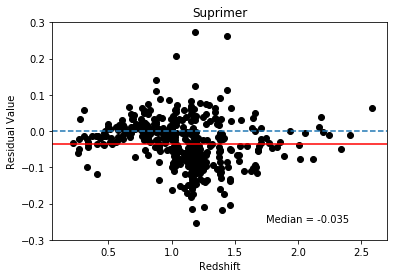

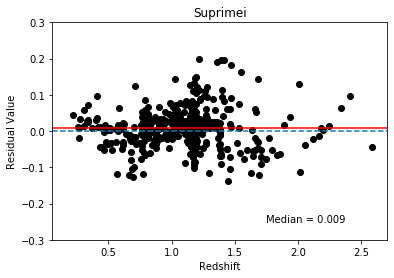

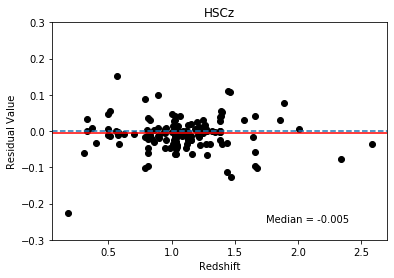

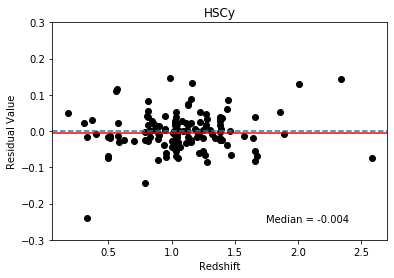

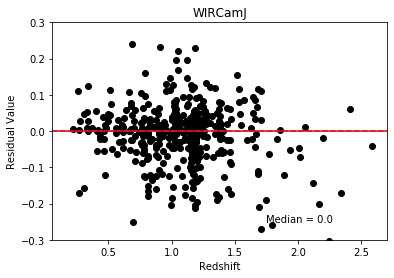

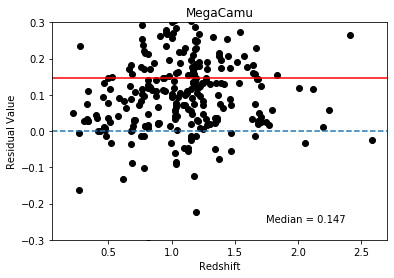

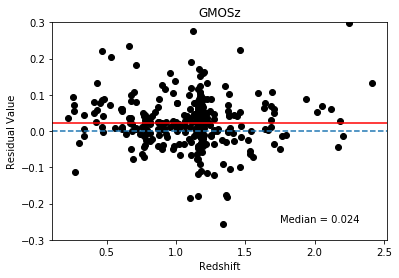

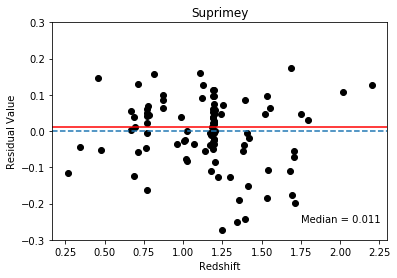

In [40]:
for filt in resid:
    #print(filt)
    resmed = stat.median(resid[filt]['resid'])
    resdiff = resmed - 0.0
    plt.plot(resid[filt]['z'], resid[filt]['resid'], 'ko')
    plt.title(filt)
    plt.text(x = 1.75, y = -0.25, s = 'Median = ' + str(round(resmed, 3)))
    plt.xlabel('Redshift')
    plt.ylabel('Residual Value')
    plt.axhline(y = 0, ls = '--')
    plt.axhline(y = resmed, color = 'red')
    plt.ylim([-.3, 0.3])
    plt.show()

'Bad Filters':
It appears that the filters that have the most error within them are FOURSTARKs (-0.061), VIMOSU (0.053), IRAC1 (0.51), MegaCamu (0.147). These are considered bad because they are over 5 percent error from the expected value of the flux measurements. Five percent in error for reading flux values can possibly skew redshifts enough to give the discrepancy between the photometric redshifts and the spectroscopic redshifts. It is noted that the largest error comes from the U band. I would have thought it would come from the longer wavelengths since the targets are fainter. This could also be due to saturation of too much light.

'Intermediate Filters': Any filter that is between 2 and 5 percent is considered intermediate. This means that it could be the cause of discrepancies but not as much as the 'bad' filters. VIMOSB (-0.029), HAWKIJ (0.025), FOURSTARJ (0.032), HAWKIY (0.027), WIRCamK (-0.026), Suprimeg (-0.047), Suprimer (-0.035), GMOSz (0.024). There is no apparent correlation between wavelength and error, it seems pretty consistent across the board.

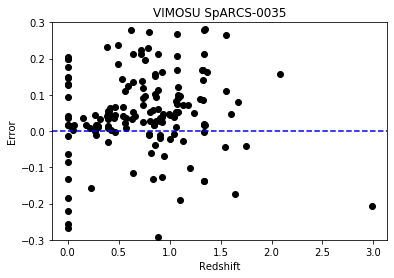

StatisticsError: no median for empty data

In [58]:
for cname in clustname: #I want this block to run through each filter for a particular cluster to see if the
    #cluster is the cause of the discrepancy or not. I want to basically run the code above, but make it run
    
    #for one particular cluster, not all of them.
    for filt in filtlam:
        igoodclust = np.where(resid[filt]['clustname'] == cname) 
        cresmed = stat.median(resid[filt]['resid'][igoodclust])
        #print(igoodclust)
        if len(igoodclust[0]) > 1:
            plt.plot(resid[filt]['z'][igoodclust], resid[filt]['resid'][igoodclust], 'ko')  
        #I want to go through the values in resid
    #that only correlate to values in a particular galaxy, in this case SpARCS-0035. The problem is, resid 
    #dictionary does not include clustname, so as of right now there is no way to determine which values
    #go with each cluster. I could go through each file in range of the cluster that is consider 'good', make
    #a dictionary for each cluster, but I feel like this is more work than needed. What if I denote in the above
    #block which values correlate to each cluster? Like add another dictionary/array to the resid dictionary for
    #each clustername which looks at where the values came from and adds them to a dictionary/array named after
    #that cluster
        #plt.title(filt + cname)
            plt.ylim([-.3, .3])
            #plt.axhline(y = cresmed, color = 'red')
            plt.axhline(y = 0.0, color = 'blue', ls = '--')
            plt.title(filt + ' ' + cname)
            plt.xlabel('Redshift')
            plt.ylabel('Error')
            plt.show()
            #print(cresmed)